# Initialization (should be hidden)

In [5]:
from __future__ import print_function # py 2.7 compat.
import base64
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets # Widget definitions.
from traitlets import Unicode # Traitlet needed to add synced attributes to the widget.

import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('.')
from temp_codes.model_widget import ModelUploadWidget
from temp_codes.model import Model

In [6]:
%%javascript

requirejs.undef('filepicker');

define('filepicker', ["jupyter-js-widgets"], function(widgets) {

    var FilePickerView = widgets.DOMWidgetView.extend({

        render: function() {
            // Render the view.
            this.setElement($('<input />')
                .attr('type', 'file'));
        },
        
        events: {
            // List of events and their handlers.
            'change': 'handle_file_change',
        },
       
        handle_file_change: function(evt) { 
            // Handle when the user has changed the file.
            
            // Retrieve the first (and only!) File from the FileList object
            var file = evt.target.files[0];
            if (file) {

                // Read the file's textual content and set value to those contents.
                var that = this;
                var file_reader = new FileReader();
                file_reader.onload = function(e) {
                    that.model.set('value', e.target.result);
                    that.touch();
                }
                file_reader.readAsText(file);
            } else {

                // The file couldn't be opened.  Send an error msg to the
                // back-end.
                this.send({ 'event': 'error' });
            }

            // Set the filename of the file.
            this.model.set('filename', file.name);
            this.touch();
        },
    });
    
    return {
        FilePickerView: FilePickerView
    };  
});

<IPython.core.display.Javascript object>

In [3]:
w = ModelUploadWidget(Model); w

Loading agar_data_try.dat


In [7]:
w.model

A XXX model with 371 measures

/opt/test-binder/temp_codes/ls_5.py:27: RuntimeWarning: divide by zero encountered in true_divide
  interm1=r_sq/(4*kapa*t)
/opt/test-binder/temp_codes/ls_5.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  interm2[cnt]=r_sq/(4*kapa*(t[cnt]-t0))
/opt/test-binder/temp_codes/ls_5.py:33: RuntimeWarning: divide by zero encountered in true_divide
  interm2[cnt]=r_sq/(4*kapa*(t[cnt]-t0))
/opt/test-binder/temp_codes/ls_5.py:47: RuntimeWarning: invalid value encountered in subtract
  return y0 - func(x,t,p)


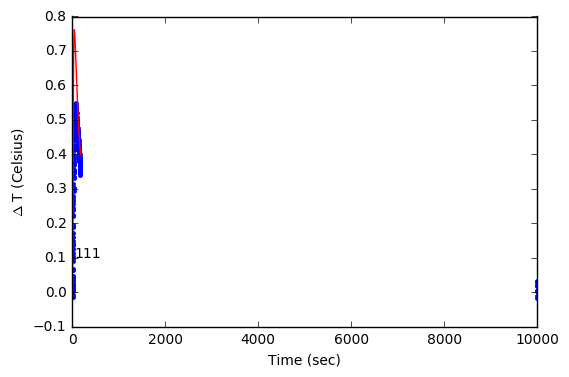

In [8]:
rho_widget=widgets.BoundedFloatText(
    value=1000, min=10, max=10**6, step=1,
    description='rho (xxx/sss)')
t0_widget=widgets.BoundedFloatText(
    value=8, min=1, max=10, step=.1,
    description='t0 (sec)')
@interact()
def line_source_plot(t0: t0_widget, rho: rho_widget):
    tim, y_data, y_fit = w.model.line_source(t0=t0,rho=rho)
    plt.plot(tim,y_data,'.')
    plt.plot(tim,y_fit,'r')
    plt.xlabel('Time (sec)')
    plt.ylabel('$\Delta$ T (Celsius)')
    plt.text(t0+50,0.1,111)
    plt.show()

In [ ]:
import numpy
numpy.asarray(w.model.normalized_temperature_series)

In [ ]:
numpy.asarray(w.model.normalized_temperature_series.keys())